In [44]:
import numpy as np
import pandas as pd

In [45]:
fold_0=pd.read_table('data/data1/fold_0_data.txt')
fold_1=pd.read_table('data/data1/fold_1_data.txt')
fold_2=pd.read_table('data/data1/fold_2_data.txt')
fold_3=pd.read_table('data/data1/fold_3_data.txt')
fold_4=pd.read_table('data/data1/fold_4_data.txt')

In [46]:
df = pd.concat([fold_0, fold_1, fold_2, fold_3, fold_4], ignore_index=True)
print(df.shape)

(19370, 12)


In [47]:
df = df.drop(columns = ['x', 'y', 'dx', 'dy', 'tilt_ang', 'fiducial_yaw_angle', 'fiducial_score'])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19370 entries, 0 to 19369
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         19370 non-null  object
 1   original_image  19370 non-null  object
 2   face_id         19370 non-null  int64 
 3   age             19370 non-null  object
 4   gender          18591 non-null  object
dtypes: int64(1), object(4)
memory usage: 756.8+ KB


In [49]:
df['gender'].unique()

array(['f', 'm', nan, 'u'], dtype=object)

<AxesSubplot:ylabel='gender'>

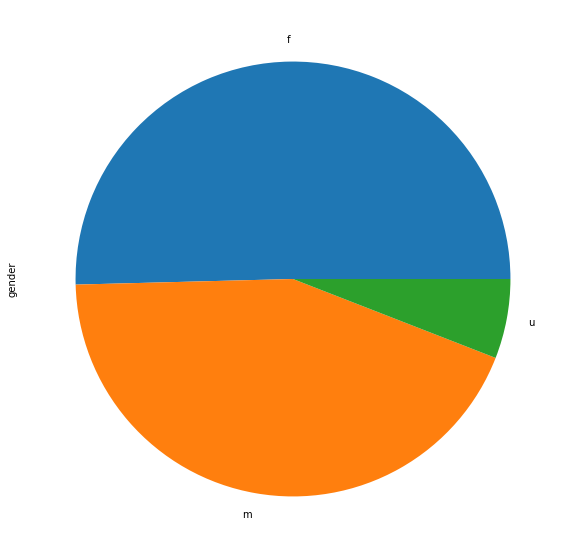

In [50]:
df.groupby('gender')['gender'].count().plot.pie(figsize=(10, 10))

In [51]:
df['age'].unique()

array(['(25, 32)', '(38, 43)', '(4, 6)', '(60, 100)', '(15, 20)',
       '(48, 53)', '(8, 12)', '(0, 2)', 'None', '(38, 48)', '35', '3',
       '55', '58', '22', '13', '45', '36', '23', '(38, 42)', '(8, 23)',
       '(27, 32)', '57', '56', '2', '29', '34', '42', '46', '32'],
      dtype=object)

<AxesSubplot:ylabel='age'>

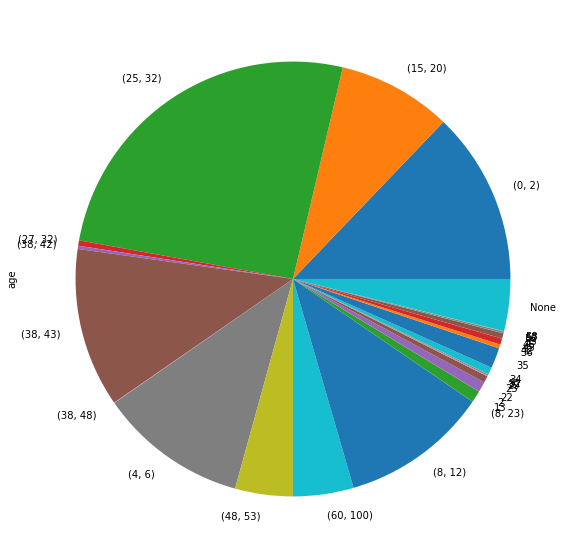

In [52]:
df.groupby('age')['age'].count().plot.pie(figsize=(10, 10))

In [53]:
df[df['age'] == 'None']

,user_id,original_image,face_id,age,gender
1410,37303189@N08,10295123316_9e9f19b7ce_o.jpg,92,None,NaN
1957,10044155@N06,11345807533_ab928c065a_o.jpg,154,None,NaN
3452,113528649@N08,11760388013_15a013288d_o.jpg,334,None,NaN
3457,113528649@N08,11761331016_194bff7414_o.jpg,334,None,NaN
3460,113528649@N08,11769798183_5ec3aa9ae3_o.jpg,334,None,NaN
...,...,...,...,...,...
19365,7153718@N04,11598838386_349a0d4849_o.jpg,2282,None,NaN
19366,7153718@N04,11598166203_c70bb34c80_o.jpg,2283,None,NaN
19367,7153718@N04,11598166203_c70bb34c80_o.jpg,2282,None,NaN
19368,7153718@N04,11598145163_733cb99713_o.jpg,2282,None,NaN


In [54]:
row = df[df['age'] == 'None'].index

In [55]:
df = df.drop(index=row)

In [56]:
df[1408:2000]

,user_id,original_image,face_id,age,gender
1408,37303189@N08,9115652665_3667a8677d_o.jpg,84,"(0, 2)",m
1409,37303189@N08,8863049438_bec978af41_o.jpg,84,"(0, 2)",m
1411,37303189@N08,8862878441_4aecd2e9e2_o.jpg,84,"(0, 2)",m
1412,37303189@N08,10295273943_8c09fc6fc9_o.jpg,84,"(0, 2)",m
1413,37303189@N08,9657620401_3e4367acbd_o.jpg,84,"(0, 2)",m
...,...,...,...,...,...
1997,10044155@N06,11331401403_bb5944aa2d_o.jpg,134,"(48, 53)",m
1998,10044155@N06,11331401403_bb5944aa2d_o.jpg,140,"(38, 43)",m
1999,10044155@N06,11331401403_bb5944aa2d_o.jpg,146,"(48, 53)",m
2000,10044155@N06,11331401403_bb5944aa2d_o.jpg,148,"(48, 53)",f


In [57]:
df.isna().sum()

user_id            0
original_image     0
face_id            0
age                0
gender            71
dtype: int64

In [58]:
df[df['gender'].isna()]

,user_id,original_image,face_id,age,gender
4231,7380406@N04,11505739386_1d90b1ac51_o.jpg,437,"(60, 100)",NaN
6980,114987449@N03,12053404536_1bed68f486_o.jpg,651,"(60, 100)",NaN
7034,114987449@N03,12052852143_09752a86cc_o.jpg,651,"(60, 100)",NaN
7689,39615950@N00,9902664714_2017556faf_o.jpg,755,"(8, 12)",NaN
7710,39615950@N00,9902586355_6be3aa3ddd_o.jpg,755,"(8, 12)",NaN
...,...,...,...,...,...
18940,101591466@N03,11314818596_f06a09c493_o.jpg,2217,"(25, 32)",NaN
18945,101591466@N03,10042227423_6f5817d8e9_o.jpg,2217,"(25, 32)",NaN
18962,101591466@N03,11314885253_c8b958529f_o.jpg,2217,"(25, 32)",NaN
18967,101591466@N03,10042130245_10a481b9e9_o.jpg,2217,"(25, 32)",NaN


In [59]:
row = df[df['gender'].isna()].index

In [60]:
df = df.drop(index=row)

In [67]:
df[4230:4240]

,user_id,original_image,face_id,age,gender
index,,,,,
4281,115152228@N06,12076508893_125d254df2_o.jpg,453,"(25, 32)",m
4282,115152228@N06,12076761336_204510e9e6_o.jpg,453,"(25, 32)",m
4283,115152228@N06,12076761336_204510e9e6_o.jpg,455,"(25, 32)",m
4284,115152228@N06,12076558754_6f50e02aa2_o.jpg,453,"(25, 32)",m
4285,115152228@N06,12076591864_e4040c62d9_o.jpg,453,"(25, 32)",m
4286,115152228@N06,12076549294_ba49442189_o.jpg,453,"(25, 32)",m
4287,115152228@N06,12076500083_ac308d5839_o.jpg,453,"(25, 32)",m
4288,115152228@N06,12076797454_e04ce153ec_o.jpg,453,"(25, 32)",m
4289,115152228@N06,12076468333_6809a1f237_o.jpg,453,"(25, 32)",m


In [68]:
df = df.reset_index()

In [69]:
df.set_index('index', inplace=True)

In [70]:
df['age'].unique()

array(['(25, 32)', '(38, 43)', '(4, 6)', '(60, 100)', '(15, 20)',
       '(48, 53)', '(8, 12)', '(0, 2)', '(38, 48)', '35', '3', '55', '58',
       '22', '13', '45', '36', '23', '(38, 42)', '(8, 23)', '(27, 32)',
       '57', '2', '29', '34', '42', '46'], dtype=object)

In [71]:
df['gender'].unique()

array(['f', 'm', 'u'], dtype=object)

In [72]:
df.isna().sum()

user_id           0
original_image    0
face_id           0
age               0
gender            0
dtype: int64

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18551 entries, 0 to 19345
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         18551 non-null  object
 1   original_image  18551 non-null  object
 2   face_id         18551 non-null  int64 
 3   age             18551 non-null  object
 4   gender          18551 non-null  object
dtypes: int64(1), object(4)
memory usage: 869.6+ KB


In [74]:
df.to_csv('data/data1/total_data.csv')

In [75]:
df

,user_id,original_image,face_id,age,gender
index,,,,,
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m
...,...,...,...,...,...
19341,101515718@N03,10587826073_6663f5b654_o.jpg,2280,"(25, 32)",f
19342,101515718@N03,10587571495_a61785cd06_o.jpg,2278,"(25, 32)",m
19343,101515718@N03,10587571495_a61785cd06_o.jpg,2279,"(25, 32)",f
